In [2]:
from caveclient import CAVEclient, auth
from caveclient import chunkedgraph as cg
import datetime
from itertools import accumulate

In [3]:
url = "https://local.brain-wire-test.org"
global_url = "https://global.brain-wire-test.org/"
datastack = "h01_c3_flat"
dataset = "h01_full0_v2"

In [4]:
client = CAVEclient(datastack_name=datastack, server_address=global_url)

In [5]:
cggraph = cg.ChunkedGraphClient(server_address=url, table_name=dataset, auth_client=auth.AuthClient(token=client.auth.token))

### Get all user IDs

In [6]:
usr_list = client.auth.get_group_users(group_id=1) # get all users in the default group
ids = [item['id'] for item in usr_list]

print(ids)

[1, 4, 5, 8, 9, 10, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 26, 27, 28, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 51, 52, 53, 54, 56, 57, 46, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107]


In [7]:
def evenly_spaced_timestamps(start_date, end_date, n):
    time_diff_seconds = (end_date - start_date).total_seconds()
    interval_seconds = time_diff_seconds / (n - 1)
    timestamps = [int(start_date.timestamp()) + i * interval_seconds for i in range(n)]
    return [datetime.datetime.fromtimestamp(val) for val in timestamps]

### Iterate over all users and count number of edits


In [14]:
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime.now()
interval = 15

total_edits = []
timestamps = evenly_spaced_timestamps(start, end, interval)

for timestamp in timestamps[1:]:
    edits = 0
    for user_id in ids:
        operations = cggraph.get_user_operations(user_id=user_id, timestamp_start=start, timestamp_end=timestamp)
        edits += len(operations)
    total_edits.append(edits)
    start = timestamp

cumulative = list(accumulate(total_edits))

print("Total edits: " + str(total_edits))
print("Cumulative edits: " + str(cumulative))


Total edits: [0, 0, 0, 0, 2294, 1479, 2482, 1278, 1399, 5142, 4492, 1423, 1419, 1354]
Cumulative edits: [0, 0, 0, 0, 2294, 3773, 6255, 7533, 8932, 14074, 18566, 19989, 21408, 22762]
[0, 0, 0, 0, 2294, 1479, 2482, 1278, 1399, 5142, 4492, 1423, 1419, 1354]


### Plot Results as Line Chart

Matplotlib is building the font cache; this may take a moment.


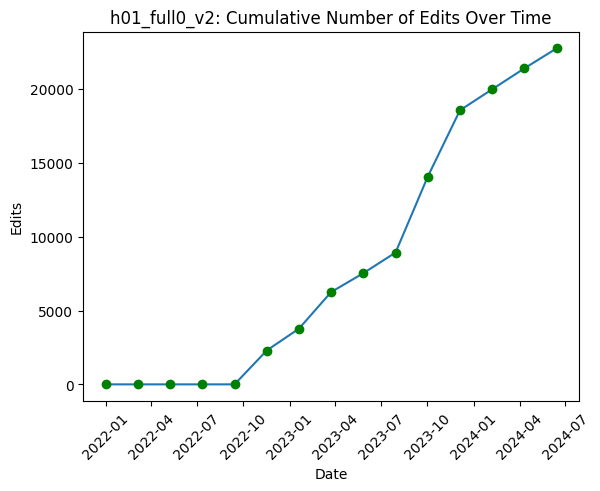

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'Date': timestamps, 'Edits': [0] + cumulative})
sns.lineplot(data=df, x='Date', y='Edits')
plt.plot(timestamps, [0] + cumulative, 'go')
plt.xticks(rotation=45)
plt.title('{}: Cumulative Number of Edits Over Time'.format(dataset))
plt.show()

In [8]:
usr_list = client.auth.get_group_users(group_id=1)

## Edits by user

In [12]:
cggraph = cg.ChunkedGraphClient(server_address=url, table_name=dataset, auth_client=auth.AuthClient(token=client.auth.token))

start = datetime.datetime(2022, 1, 1)
end = datetime.datetime.now()
# interval = 15

total_edits = []
# timestamps = evenly_spaced_timestamps(start, end, interval)

for user_id in ids:
    operations = cggraph.get_user_operations(user_id=user_id, timestamp_start=start, timestamp_end=end)
    total_edits.append(len(operations))
    # start = timestamp

# confirm total edits
cumulative = list(accumulate(total_edits))

print("Total edits: " + str(total_edits))
print("user ids: " + str(ids))


Total edits: [1379, 40, 0, 1, 0, 0, 0, 0, 0, 3, 0, 7, 0, 410, 2588, 0, 6225, 0, 0, 0, 62, 3, 2, 0, 0, 0, 0, 0, 2368, 0, 0, 0, 0, 2993, 2134, 3941, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 359, 0, 0, 0, 0, 0, 0, 0, 0, 191, 0, 0, 0, 0, 63, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
user ids: [1, 4, 5, 8, 9, 10, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 26, 27, 28, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 51, 52, 53, 54, 56, 57, 46, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107]


## Plot edits by user, aggregate edits by name

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Creating DataFrames
usr_df = pd.DataFrame(usr_list)
edits_df = pd.DataFrame({'id': ids, 'edits': total_edits})

# Merging DataFrames on 'id'
merged_df = pd.merge(usr_df, edits_df, on='id', how='left')
merged_df['normalized_name'] = merged_df['name'].str.lower()

# Group by 'name' and sum the edits
result_df = merged_df.groupby('normalized_name', as_index=False).agg({
    'edits': 'sum',
    'id': 'first'
}).rename(columns={'id':'user'})

In [14]:
result_df[result_df.edits != 0].shape

(18, 3)

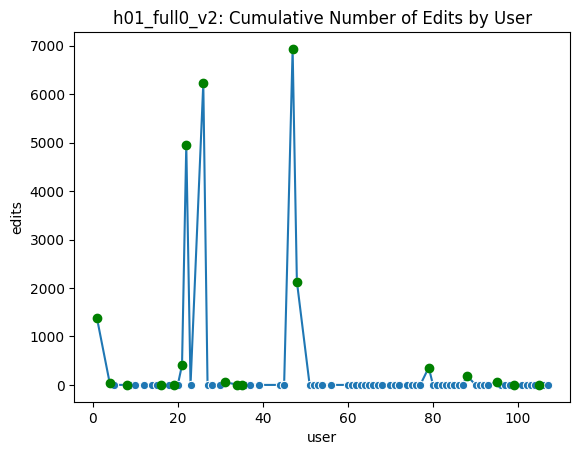

In [16]:
sns.lineplot(data=result_df, x='user', y='edits', marker='o', linestyle='-')

# Plotting green dots only where edits are greater than 0
for x, y in zip(result_df['user'], result_df['edits']):
    if y > 0:
        plt.plot(x, y, 'go')

# Assuming 'dataset' is a predefined variable that you want to use in your title
plt.title(f'{dataset}: Cumulative Number of Edits by User')

# Show the plot
plt.show()

## Get user operations

In [97]:
class UserOperations:
    def __init__(self, user_id, timestamp_start, timestamp_end):
        self.user_id = user_id
        self.timestamp_start = timestamp_start
        self.timestamp_end = timestamp_end
        self.user_operations = pd.DataFrame()
        self.user_operations_details = {}
        self.operation_roots = []

    def getUserOperations(self):
        self.user_operations = cggraph.get_user_operations(user_id=self.user_id, timestamp_start=self.timestamp_start, timestamp_end=self.timestamp_end)

    def getUserOperationsDetails(self):
        if 'operation_id' in self.user_operations.columns:
            self.user_operations_details = cggraph.get_operation_details(self.user_operations.operation_id.values)

    def getOperationRoots(self):
        if self.user_operations.empty:
            self.getUserOperations()
        if not self.user_operations_details:
            self.getUserOperationsDetails()
            
        for id, details in self.user_operations_details.items():
            try:
                self.operation_roots.append(details['roots'][0]) 
            except IndexError:
                pass
        print(list(set(self.operation_roots)))

In [98]:
start = datetime.datetime(2024, 5, 1)
end = datetime.datetime.now()

In [99]:
user79 = UserOperations(user_id=79, timestamp_start=start, timestamp_end=end) 

In [100]:
user79.getUserOperations()

In [ ]:
user79.getOperationRoots()

In [102]:
user88 = UserOperations(user_id=88, timestamp_start=start, timestamp_end=end)

In [ ]:
user88.getOperationRoots()